. Write a MATLAB code for PCA (Principal Component Analysis).

In [3]:
import numpy as np

In [4]:
T = 10 * np.random.rand(1000, 10)
MV = np.mean(T, axis=0)
# Covariance matrix
C = np.cov(T, rowvar=False)
# Eigen decomposition
eigen_Val, eigen_Vector = np.linalg.eig(C)
# Sort eigenvalues and eigenvectors
sorted_idx = np.argsort(eigen_Val)[::-1]
eigen_Val = eigen_Val[sorted_idx]
eigen_Vector = eigen_Vector[:, sorted_idx]
# Transform data
m = 5 # Number of principal components
Y = (T - MV) @ eigen_Vector[:, :m]
print(Y.shape)
print("Transformed data Y:\n", Y)

(1000, 5)
Transformed data Y:
 [[-3.65079585  0.9544674  -2.22679273  0.35637479 -3.64942995]
 [-3.69448258  4.30707268  3.68544216  2.72371349 -1.28029526]
 [-2.32570996  3.28156579  1.56516411 -2.71125509  4.34969948]
 ...
 [ 1.59534022  2.12633758 -2.32277359  4.09513262  3.35716395]
 [ 0.37009591  0.31460536  0.3841067  -5.61535593 -2.44896692]
 [ 2.82584965 -3.20185815 -3.25939319  3.82051732 -0.08462156]]


 Design a Nonlinear Support Vector Machine to solve XOR problem
using Polynomial Kernel.

In [5]:
import numpy as np

In [6]:
from sklearn.svm import SVC
# Training data for XOR problem
X = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]])
y = np.array([-1, 1, 1, -1])
# Polynomial Kernel SVM
clf = SVC(kernel='poly', degree=2)
clf.fit(X, y)
# Classify a new point
Xu = np.array([-0.9, 0.8])
class_u = clf.predict([Xu])
print("Class of new point:", class_u)

Class of new point: [1]


 Design a Nonlinear Support Vector Machine to solve X-NOR problem
using Radial Basis Function (RBF) Kernel.

In [7]:
import numpy as np
from sklearn.svm import SVC
# Training data for X-NOR problem
X = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]])
y = np.array([1, -1, -1, 1])
# RBF Kernel SVM
clf = SVC(kernel='rbf')
clf.fit(X, y)
# Classify a new point
Xu = np.array([-0.9, 0.8])
class_u = clf.predict([Xu])
print("Class of new point:", class_u)

Class of new point: [-1]


   Write a MATLAB code for k-mean algorithm in python.


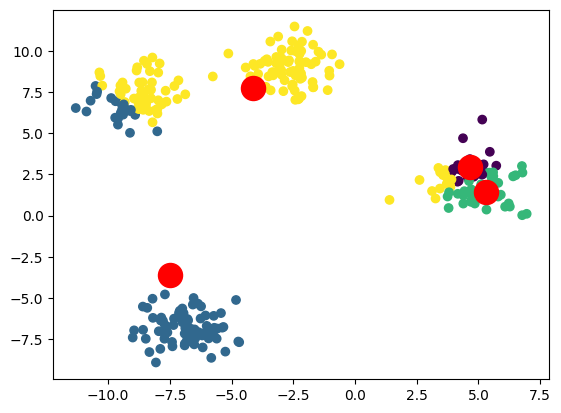

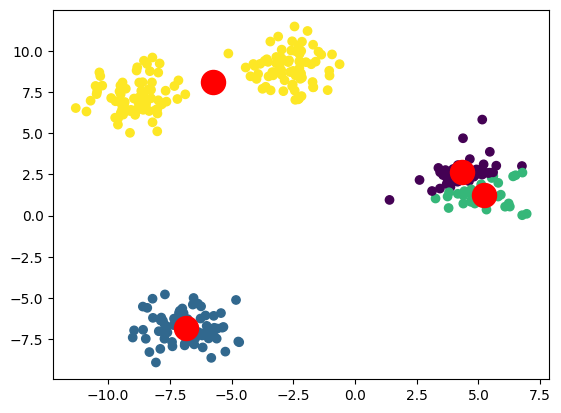

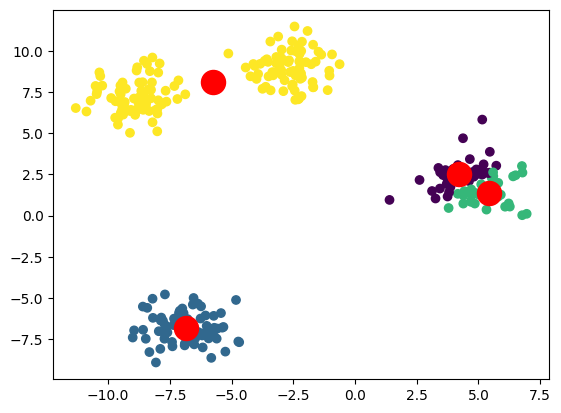

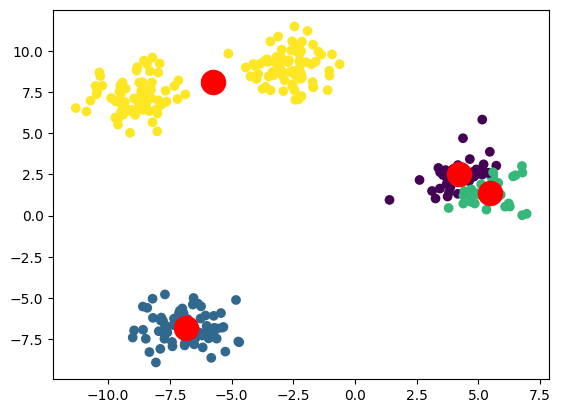

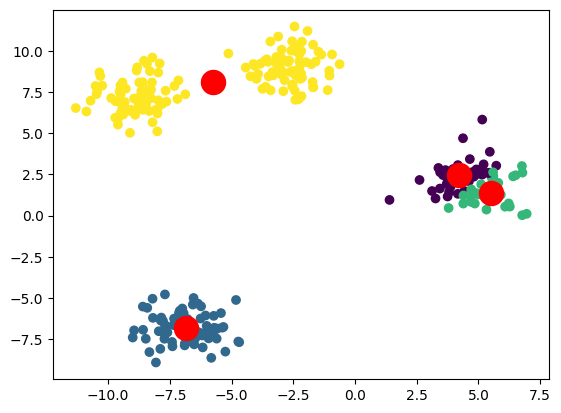

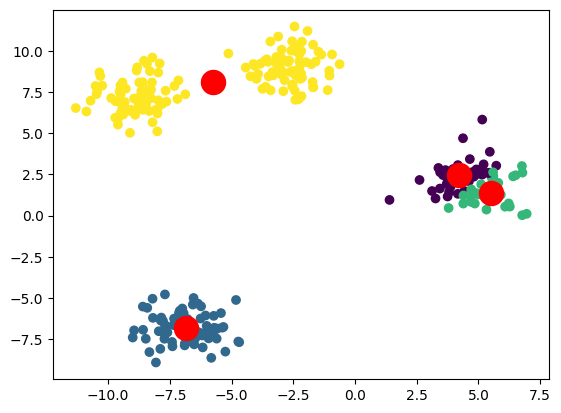

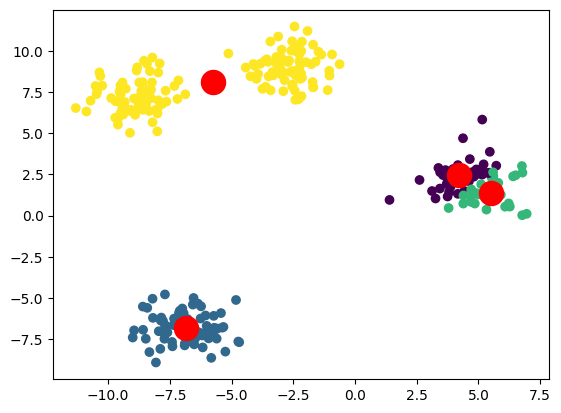

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def kmeans(X, k, max_iters=100, plot_steps=False):
    # Initialize centroids randomly from the dataset
    np.random.seed(42)
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]

    # Initialize the previous centroids to compare against
    prev_centroids = centroids.copy()

    # Array to store which cluster each sample belongs to
    clusters = np.zeros(X.shape[0])

    for _ in range(max_iters):
        # Assign each sample to the nearest centroid
        for idx, sample in enumerate(X):
            distances = np.linalg.norm(sample - centroids, axis=1)
            clusters[idx] = np.argmin(distances)

        # Update centroids to be the mean of the samples in each cluster
        for i in range(k):
            if len(X[clusters == i]) > 0:
                centroids[i] = np.mean(X[clusters == i], axis=0)

        if plot_steps:
            plot_kmeans(X, centroids, clusters)

        # If the centroids have not changed, the algorithm has converged
        if np.all(centroids == prev_centroids):
            break
        prev_centroids = centroids.copy()

    return centroids, clusters

def plot_kmeans(X, centroids, clusters):
    plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis')
    plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red')
    plt.show()

# Example usage
if __name__ == "__main__":
    # Generate sample data
    from sklearn.datasets import make_blobs

    X, _ = make_blobs(n_samples=300, centers=4, random_state=42)

    # Apply k-means algorithm
    centroids, clusters = kmeans(X, k=4, plot_steps=True)

    # Plot final result
    plot_kmeans(X, centroids, clusters)


 Write a MATLAB code for Neural Network in python.


In [10]:
import numpy as np

# Activation function: Sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of the sigmoid function for backpropagation
def sigmoid_derivative(x):
    return x * (1 - x)

# Neural Network class
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights randomly with mean 0
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size)
        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size)

    def feedforward(self, X):
        # Input to hidden layer
        self.hidden = sigmoid(np.dot(X, self.weights_input_hidden))
        # Hidden to output layer
        self.output = sigmoid(np.dot(self.hidden, self.weights_hidden_output))
        return self.output

    def backpropagation(self, X, y, output):
        # Calculate the error
        output_error = y - output
        output_delta = output_error * sigmoid_derivative(output)

        # Calculate hidden layer error
        hidden_error = output_delta.dot(self.weights_hidden_output.T)
        hidden_delta = hidden_error * sigmoid_derivative(self.hidden)

        # Update weights
        self.weights_hidden_output += self.hidden.T.dot(output_delta)
        self.weights_input_hidden += X.T.dot(hidden_delta)

    def train(self, X, y, iterations):
        for _ in range(iterations):
            output = self.feedforward(X)
            self.backpropagation(X, y, output)

# Example usage
if __name__ == "__main__":
    # Training data: XOR problem
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y = np.array([[0], [1], [1], [0]])

    # Define the neural network
    nn = NeuralNetwork(input_size=2, hidden_size=2, output_size=1)

    # Train the neural network
    nn.train(X, y, iterations=10000)

    # Test the neural network
    print("Output after training:")
    print(nn.feedforward(X))


Output after training:
[[0.03207005]
 [0.93196258]
 [0.9319627 ]
 [0.09073874]]
